In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('train.csv')

# Quick inspection
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [2]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [3]:
# Using Label Encoding for simplicity in this example
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [4]:
# Separate features and target (assuming 'Loan_Amount' is the target)
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_final = pd.DataFrame(X_scaled, columns=X.columns)

        Customer ID          Name        Gender           Age  Income (USD)  \
count  30000.000000  30000.000000  30000.000000  30000.000000  3.000000e+04   
mean   14999.500000  14999.500000      0.503533     40.092300  2.568320e+03   
std     8660.398374   8660.398374      0.499996     16.045129  1.036924e+04   
min        0.000000      0.000000      0.000000     18.000000  3.777000e+02   
25%     7499.750000   7499.750000      0.000000     25.000000  1.743305e+03   
50%    14999.500000  14999.500000      1.000000     40.000000  2.222435e+03   
75%    22499.250000  22499.250000      1.000000     55.000000  2.869142e+03   
max    29999.000000  29999.000000      1.000000     65.000000  1.777460e+06   

       Income Stability    Profession  Type of Employment      Location  \
count      30000.000000  30000.000000        30000.000000  30000.000000   
mean           0.914467      4.804900            7.892067      0.925367   
std            0.279678      2.628992            3.892110      

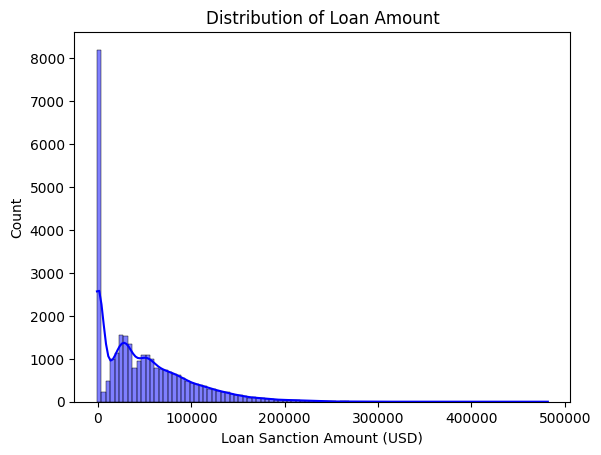

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
print(df.describe())

# Check the balance of the target variable (if categorical) or distribution
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.show()

/tmp/ipykernel_6524/2851924742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Income Stability', data=df, ax=axes[0], palette='viridis')
/tmp/ipykernel_6524/2851924742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type of Employment', data=df, ax=axes[1], palette='magma')


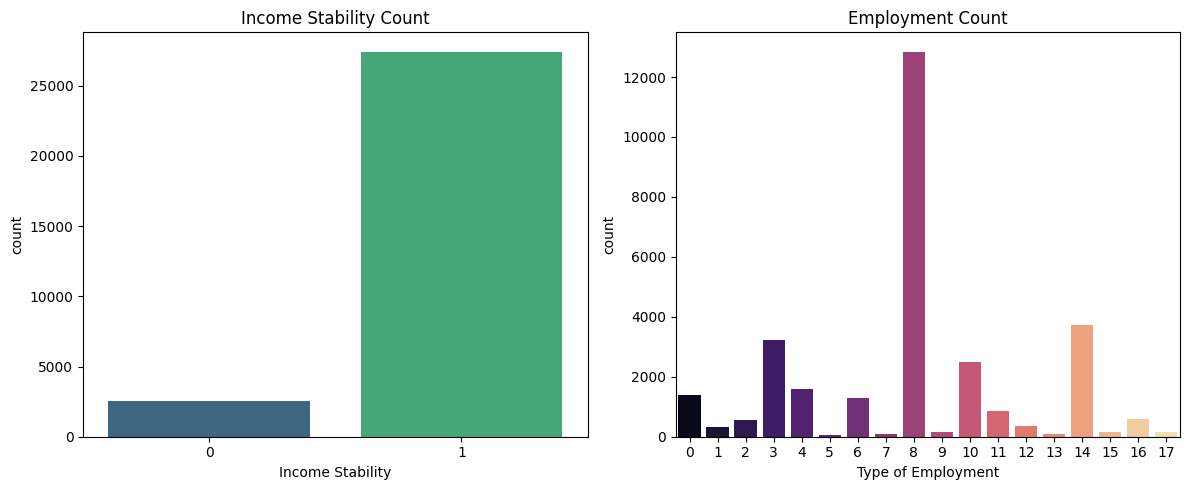

In [6]:
# Plotting counts for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Income Stability', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Income Stability Count')

sns.countplot(x='Type of Employment', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Employment Count')

plt.tight_layout()
plt.show()

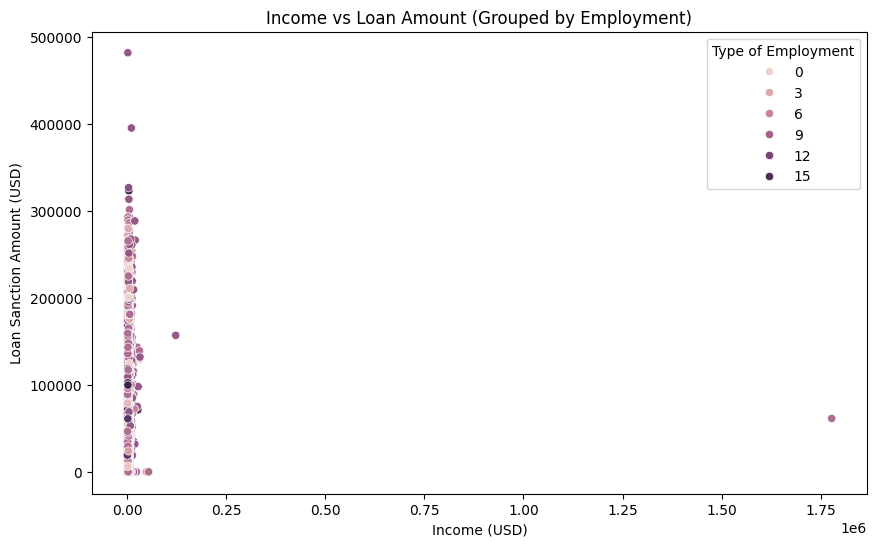

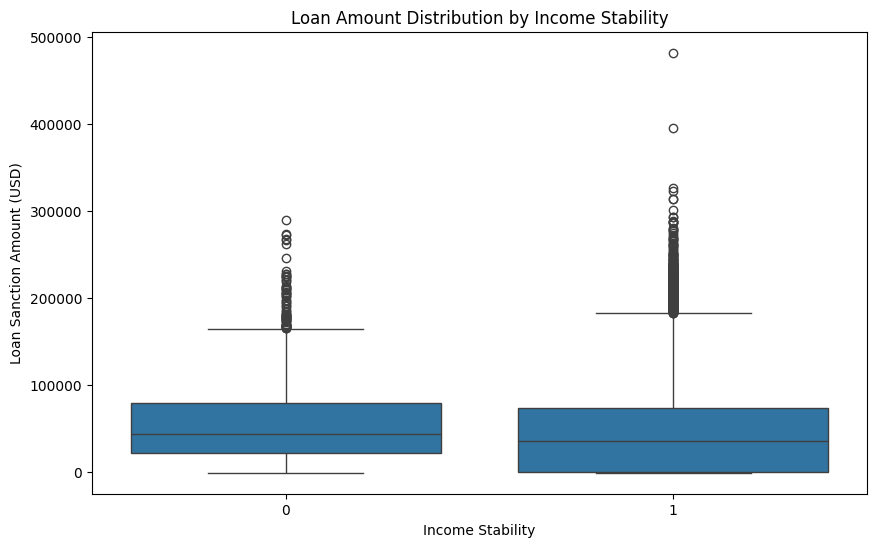

In [8]:
# Relationship between Income and Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income (USD)', y='Loan Sanction Amount (USD)', hue='Type of Employment', data=df)
plt.title('Income vs Loan Amount (Grouped by Employment)')
plt.show()

# Boxplot to detect outliers and distribution across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Stability', y='Loan Sanction Amount (USD)', data=df)
plt.title('Loan Amount Distribution by Income Stability')
plt.show()

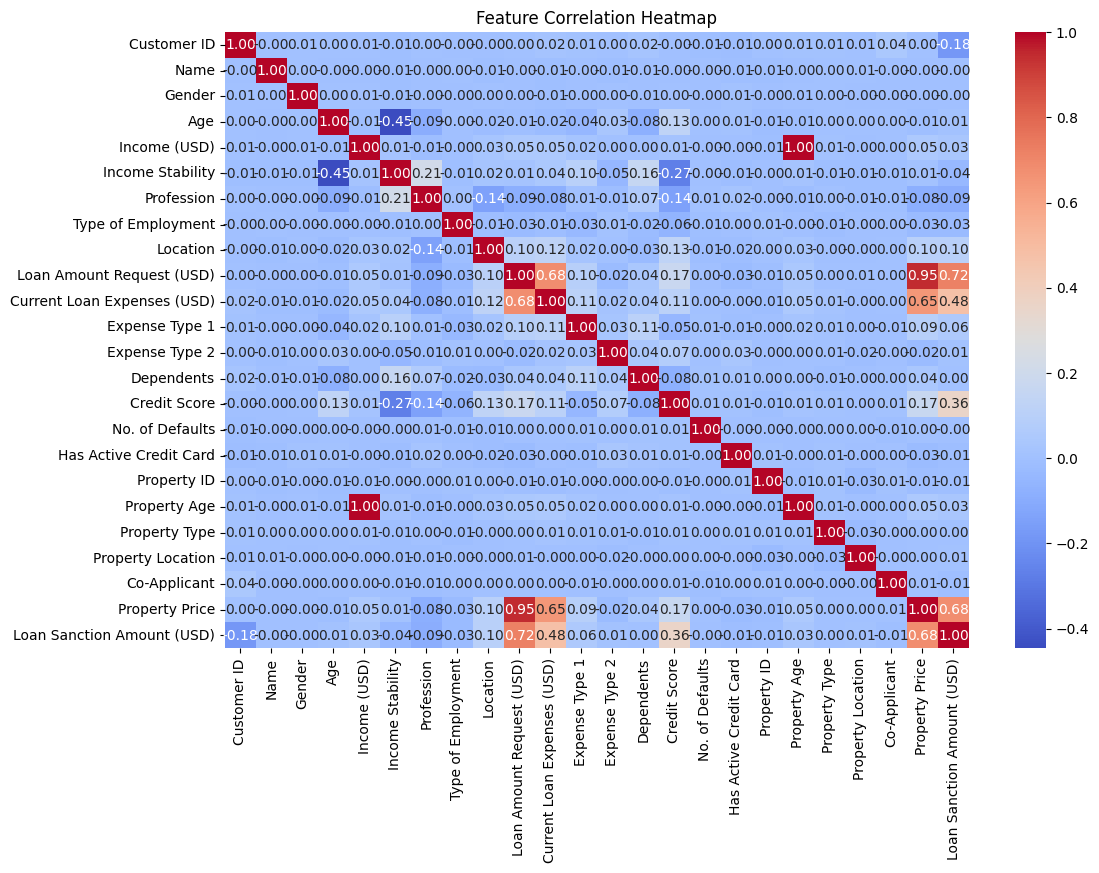

In [9]:
plt.figure(figsize=(12, 8))
# We only calculate correlation for numerical columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

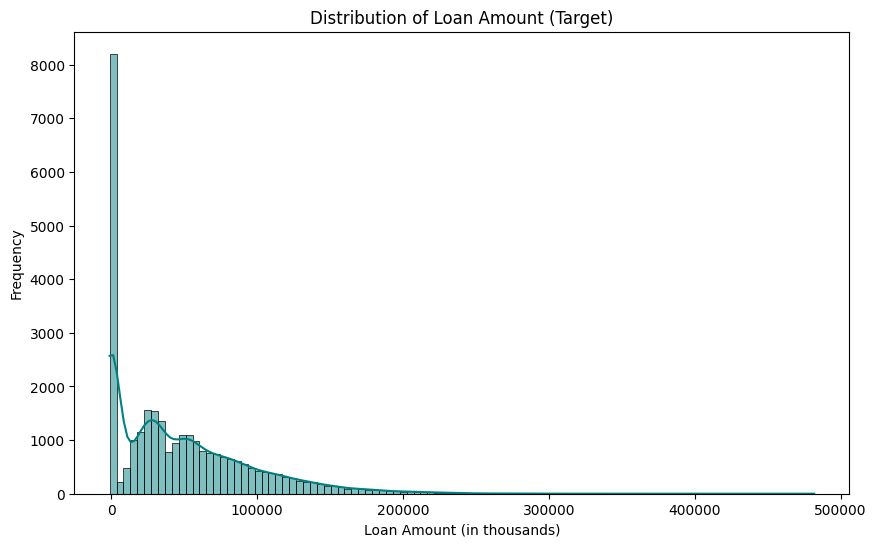

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True, color='teal')
plt.title('Distribution of Loan Amount (Target)')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.show()

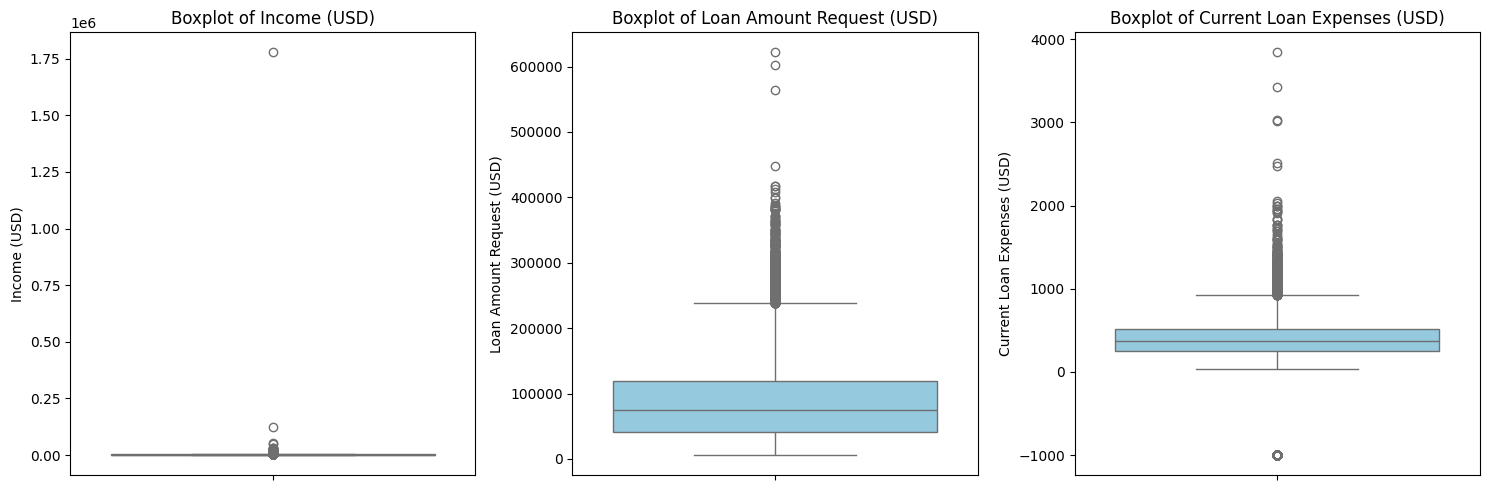

In [21]:
# List of numerical features to visualize
num_features = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

/tmp/ipykernel_6524/1152069563.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipykernel_6524/1152069563.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipykernel_6524/1152069563.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
/tmp/ipykernel_6524/1152069563.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

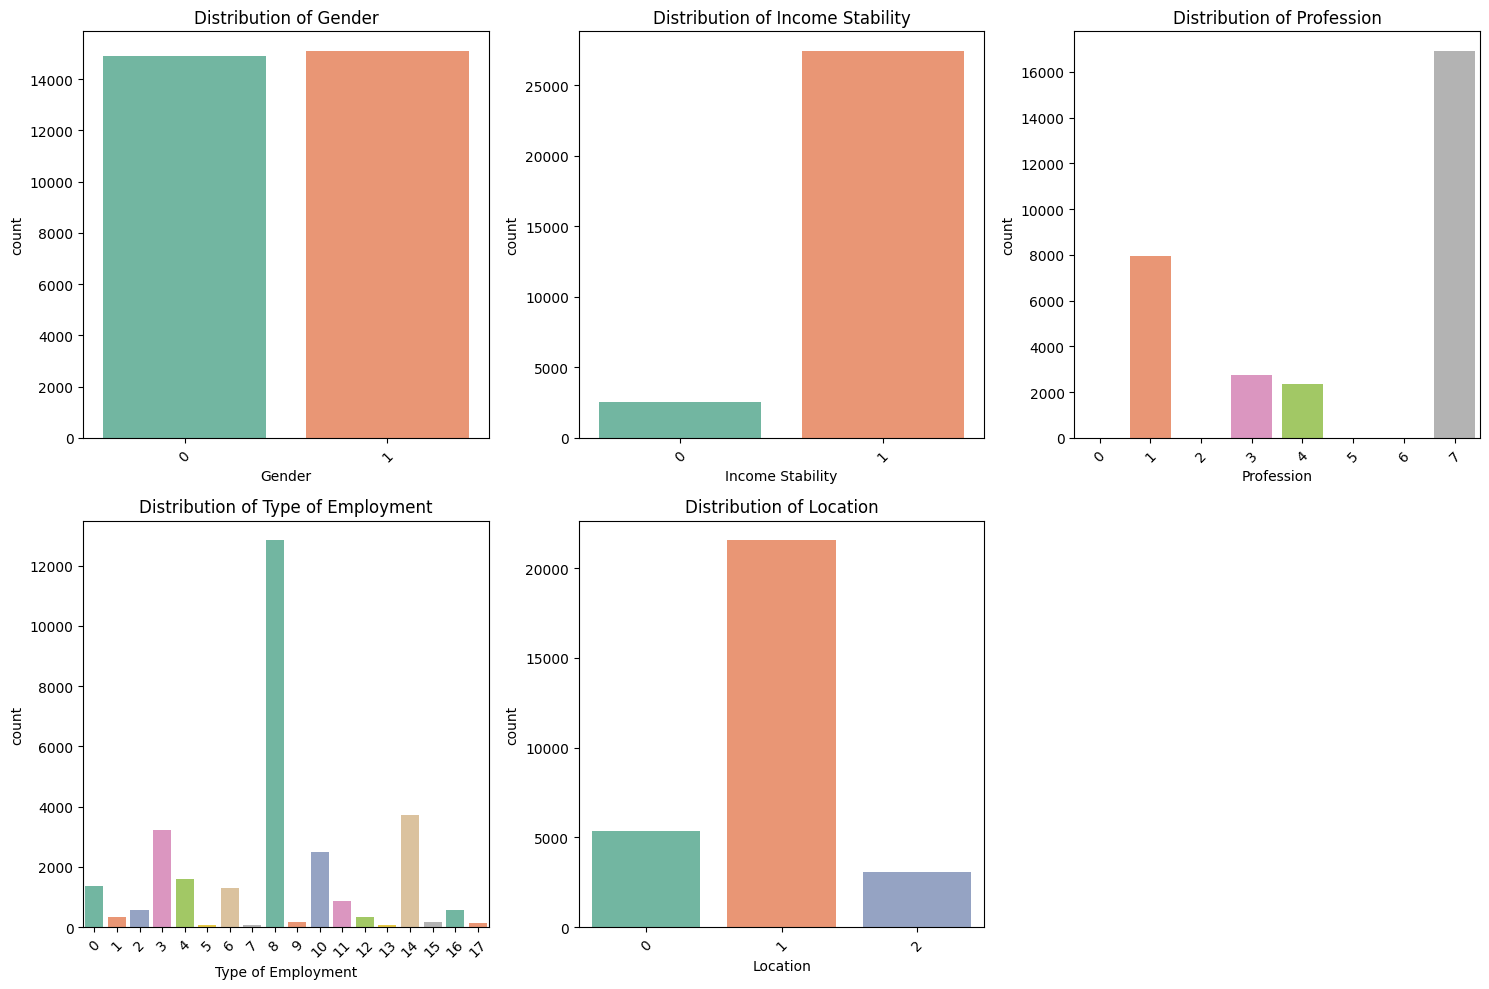

In [23]:
cat_features = ['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
# Note: Ensure you use the scaled features if you performed standardization earlier
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shapes: {X_train.shape}, {y_train.shape}")
print(f"Testing shapes: {X_test.shape}, {y_test.shape}")

Training shapes: (24000, 23), (24000,)
Testing shapes: (6000, 23), (6000,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 20785.52
RMSE: 31009.45
R2 Score: 0.58


In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Ridge Regression
ridge = Ridge(alpha=1.0) # alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 2. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# 3. Elastic Net
enet = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio=0.5 means 50% Lasso, 50% Ridge
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)

/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+13, tolerance: 5.521e+09
  model = cd_fast.enet_coordinate_descent(
/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+13, tolerance: 5.521e+09
  model = cd_fast.enet_coordinate_descent(


In [29]:
results = {
    "Model": ["Ridge", "Lasso", "Elastic Net"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_enet)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_enet)
    ]
}

print(pd.DataFrame(results))

         Model           MAE  R2 Score
0        Ridge  20785.508686  0.582025
1        Lasso  20785.497172  0.582026
2  Elastic Net  20782.034271  0.584905


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the range of alphas to test (logarithmic scale is usually best)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 1. Tuning Ridge
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# 2. Tuning Lasso
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_cv.best_params_}")
print(f"Best Lasso Alpha: {lasso_cv.best_params_}")

/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.700e+12, tolerance: 4.429e+09
  model = cd_fast.enet_coordinate_descent(
/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.431e+12, tolerance: 4.402e+09
  model = cd_fast.enet_coordinate_descent(
/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Best Ridge Alpha: {'alpha': 100}
Best Lasso Alpha: {'alpha': 10}


/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.826e+12, tolerance: 5.521e+09
  model = cd_fast.enet_coordinate_descent(


In [31]:
# Define grid for Elastic Net
enet_params = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

enet_cv = GridSearchCV(ElasticNet(), enet_params, cv=5, scoring='r2')
enet_cv.fit(X_train, y_train)

print(f"Best Elastic Net Params: {enet_cv.best_params_}")

/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.702e+12, tolerance: 4.429e+09
  model = cd_fast.enet_coordinate_descent(
/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.433e+12, tolerance: 4.402e+09
  model = cd_fast.enet_coordinate_descent(
/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Best Elastic Net Params: {'alpha': 0.1, 'l1_ratio': 0.2}


/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.319e+12, tolerance: 4.429e+09
  model = cd_fast.enet_coordinate_descent(
/home/ssn-29/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+13, tolerance: 5.521e+09
  model = cd_fast.enet_coordinate_descent(


In [32]:
# Create a summary of the best models
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
best_enet = enet_cv.best_estimator_

models = [best_ridge, best_lasso, best_enet]
model_names = ["Tuned Ridge", "Tuned Lasso", "Tuned Elastic Net"]

for name, model in zip(model_names, models):
    score = model.score(X_test, y_test)
    print(f"{name} R2 Score: {score:.4f}")

Tuned Ridge R2 Score: 0.5824
Tuned Lasso R2 Score: 0.5825
Tuned Elastic Net R2 Score: 0.5857


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Dictionary of our best tuned models
models = {
    "Linear Regression": model,
    "Tuned Ridge": best_ridge,
    "Tuned Lasso": best_lasso,
    "Tuned Elastic Net": best_enet
}

eval_metrics = []

for name, model_obj in models.items():
    preds = model_obj.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    
    eval_metrics.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 4)
    })

# Display as a Table
results_df = pd.DataFrame(eval_metrics)
print(results_df.sort_values(by="R2 Score", ascending=False))

               Model       MAE      RMSE  R2 Score
0  Linear Regression  20781.35  30872.86    0.5857
3  Tuned Elastic Net  20781.35  30872.86    0.5857
2        Tuned Lasso  20783.66  30990.17    0.5825
1        Tuned Ridge  20784.85  30994.29    0.5824


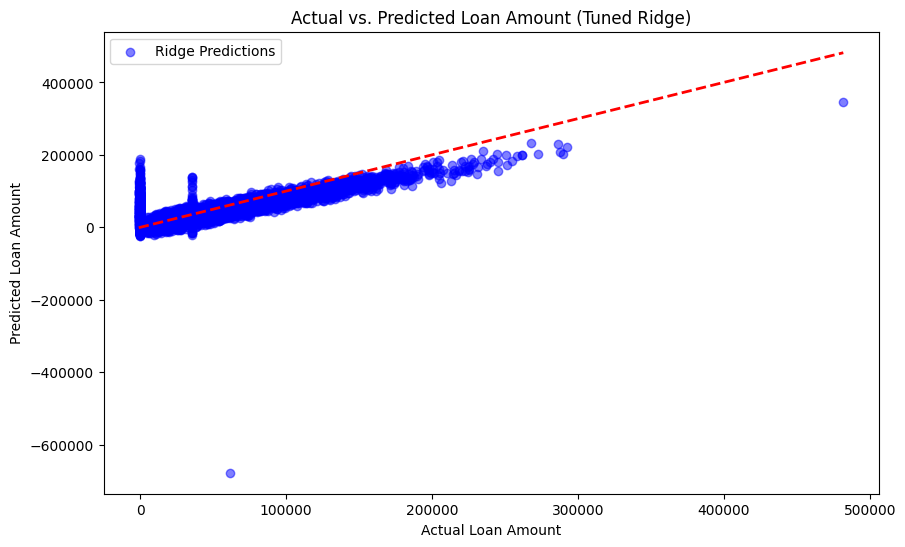

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue', label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs. Predicted Loan Amount (Tuned Ridge)')
plt.legend()
plt.show()

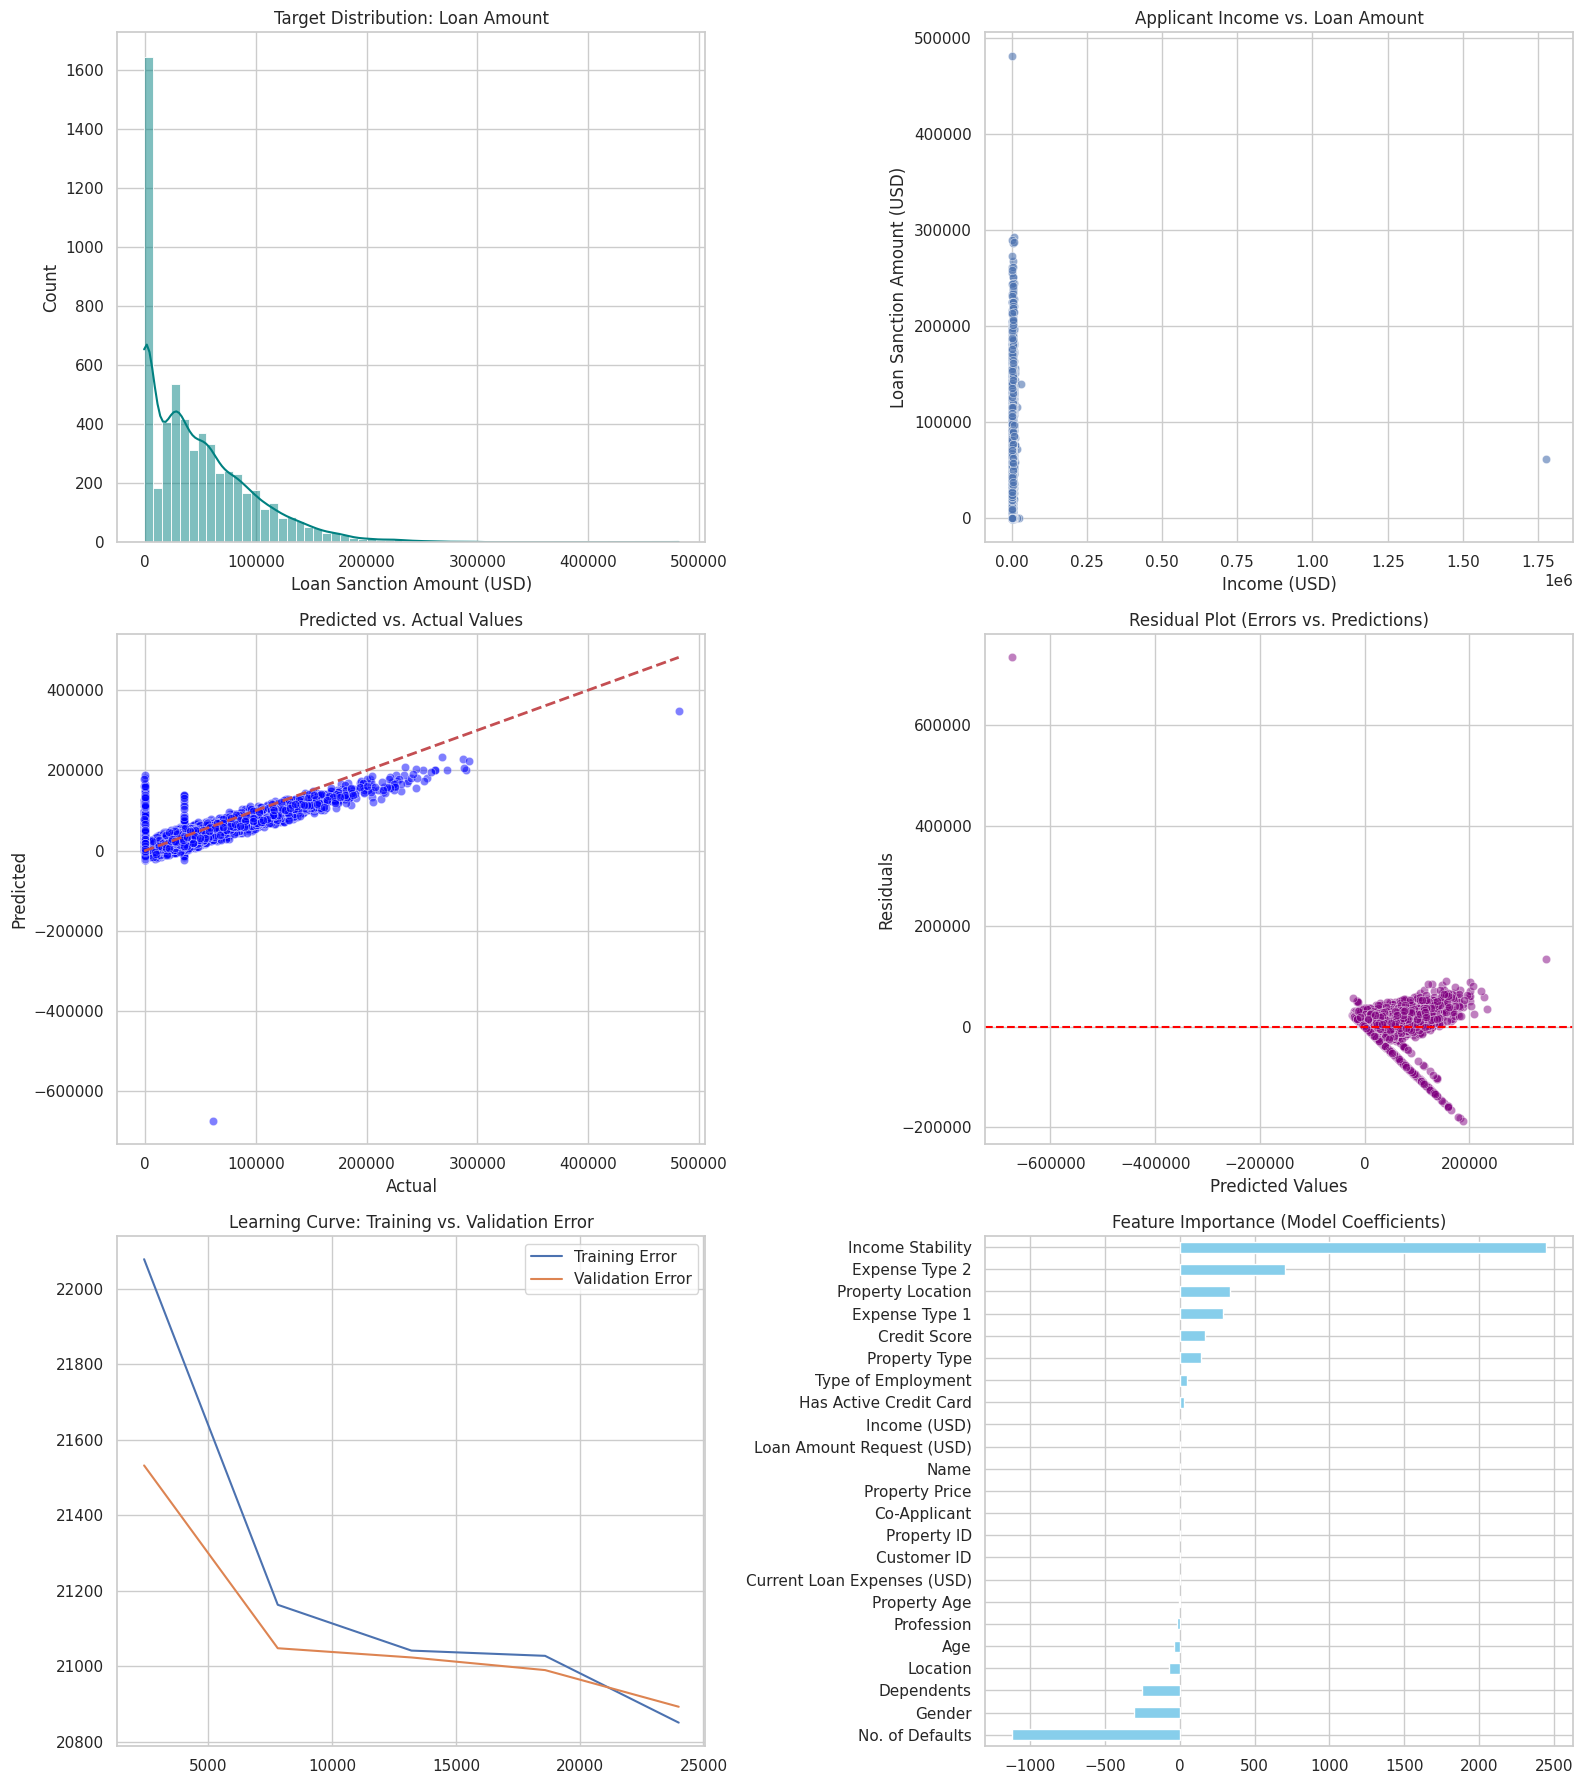

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'best_ridge' is your final model and X_test, y_test are available
y_pred = best_ridge.predict(X_test)
residuals = y_test - y_pred

# Set the visual style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Target Variable Distribution
sns.histplot(y_test, kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Target Distribution: Loan Amount')

# 2. Feature vs. Target (Example: ApplicantIncome vs Loan_Amount)
sns.scatterplot(x=X_test['Income (USD)'], y=y_test, ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Applicant Income vs. Loan Amount')

# 3. Predicted vs. Actual Values
sns.scatterplot(x=y_test, y=y_pred, ax=axes[1, 0], color='blue', alpha=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_title('Predicted vs. Actual Values')
axes[1, 0].set_xlabel('Actual')
axes[1, 0].set_ylabel('Predicted')

# 4. Residual Plot (Check for Heteroscedasticity)
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1, 1], color='purple', alpha=0.5)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title('Residual Plot (Errors vs. Predictions)')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')

# 5. Training vs. Validation Error (Learning Curve Simulation)
# Note: This typically requires plotting errors over different training sizes
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(best_ridge, X, y, cv=5, scoring='neg_mean_absolute_error')
train_mae = -train_scores.mean(axis=1)
val_mae = -val_scores.mean(axis=1)

axes[2, 0].plot(train_sizes, train_mae, label='Training Error')
axes[2, 0].plot(train_sizes, val_mae, label='Validation Error')
axes[2, 0].set_title('Learning Curve: Training vs. Validation Error')
axes[2, 0].legend()

# 6. Coefficient Comparison Bar Plot
coefs = pd.Series(best_ridge.coef_, index=X.columns).sort_values()
coefs.plot(kind='barh', ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Feature Importance (Model Coefficients)')

plt.tight_layout()
plt.show()

In [ ]:
(